In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
import os
print(os.getcwd())


c:\Users\Ayaz Khan\Desktop\Bank-Customer-Churn-Prediction\notebook\data


In [5]:
df = pd.read_csv('bank.csv')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.shape

(10000, 14)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:

df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [13]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [14]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


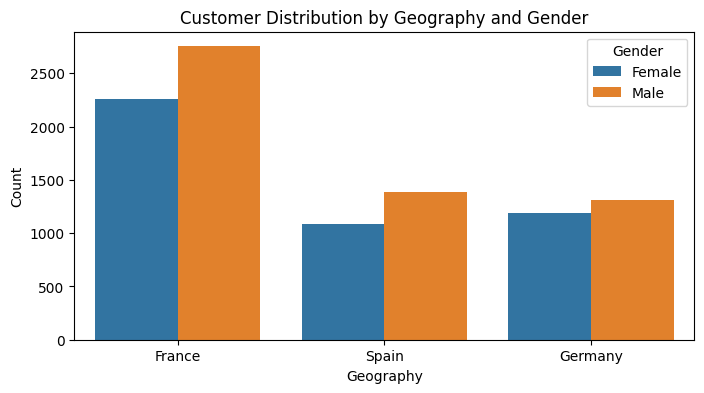

In [19]:
# Customer distribution by Geography and Gender
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Geography', hue='Gender')
plt.title('Customer Distribution by Geography and Gender')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

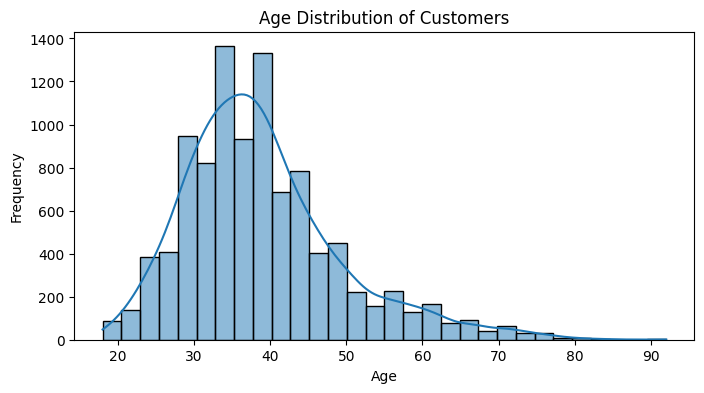

In [22]:
# Age distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

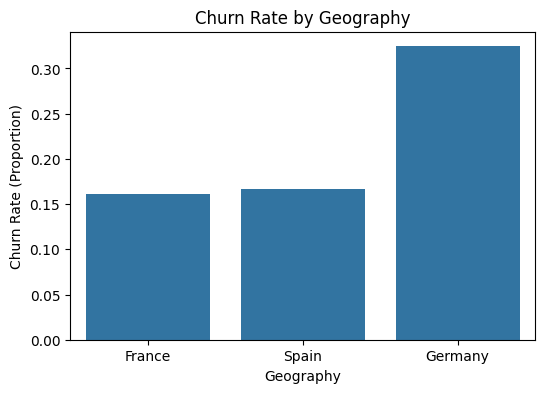

In [24]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Geography', y='Exited', ci=None)
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate (Proportion)')
plt.show()

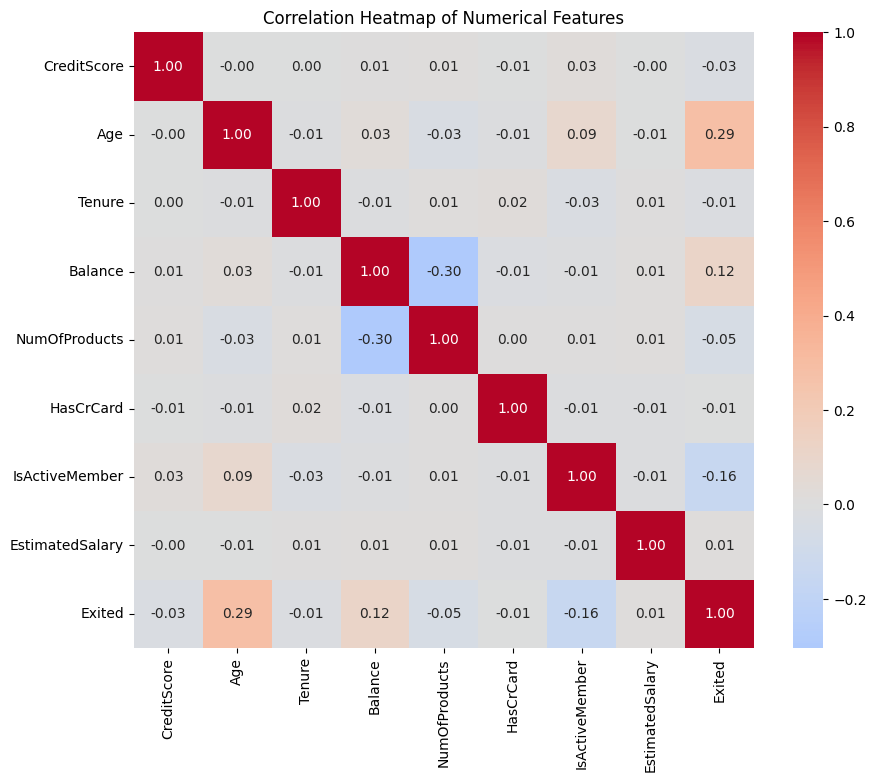

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

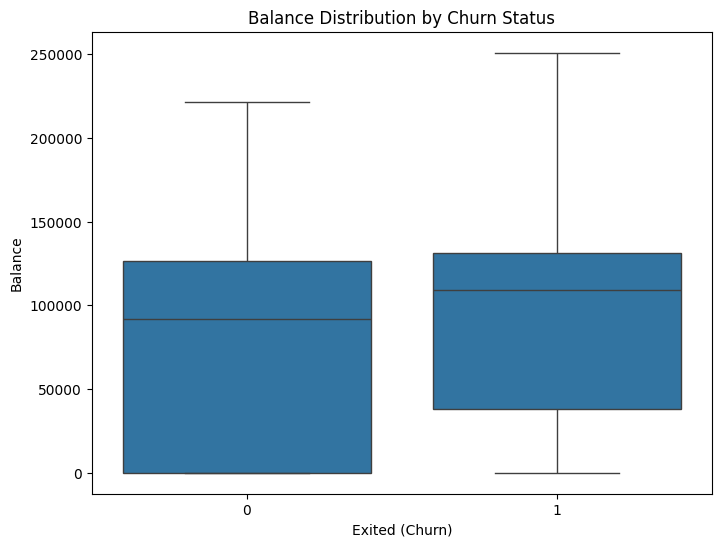

In [27]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance Distribution by Churn Status')
plt.xlabel('Exited (Churn)')
plt.ylabel('Balance')
plt.show()


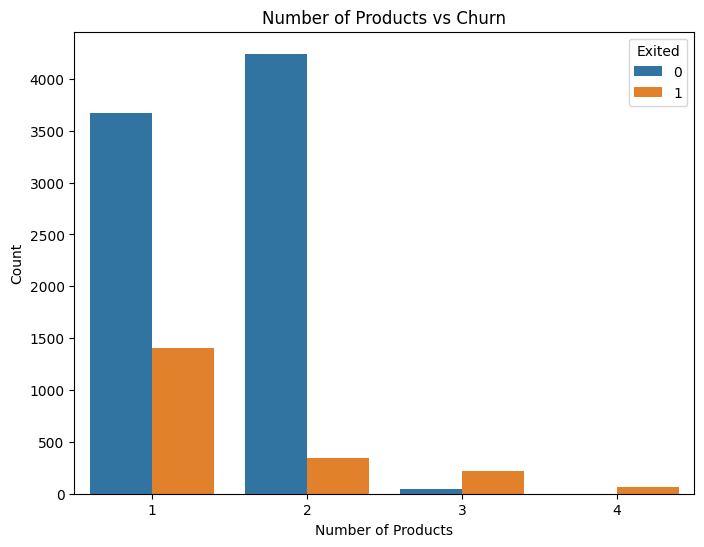

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Number of Products vs Churn')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()


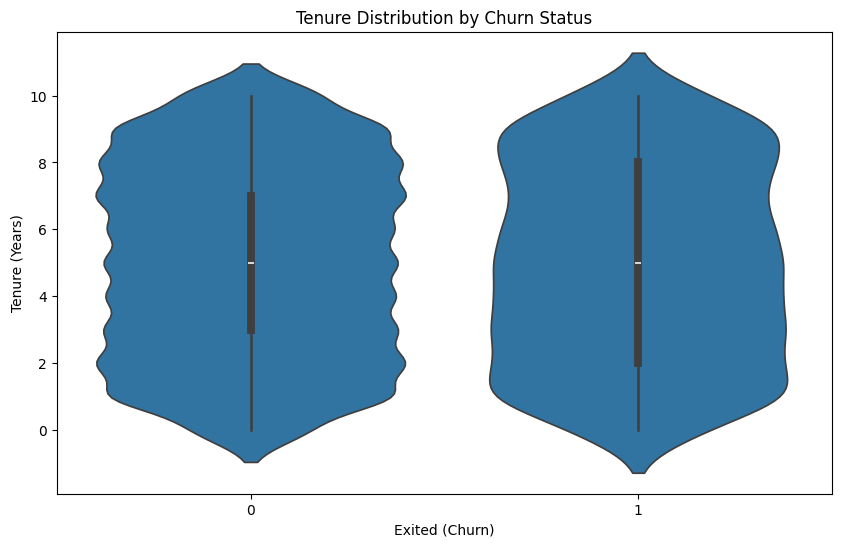

In [30]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Exited', y='Tenure', data=df)
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Exited (Churn)')
plt.ylabel('Tenure (Years)')
plt.show()


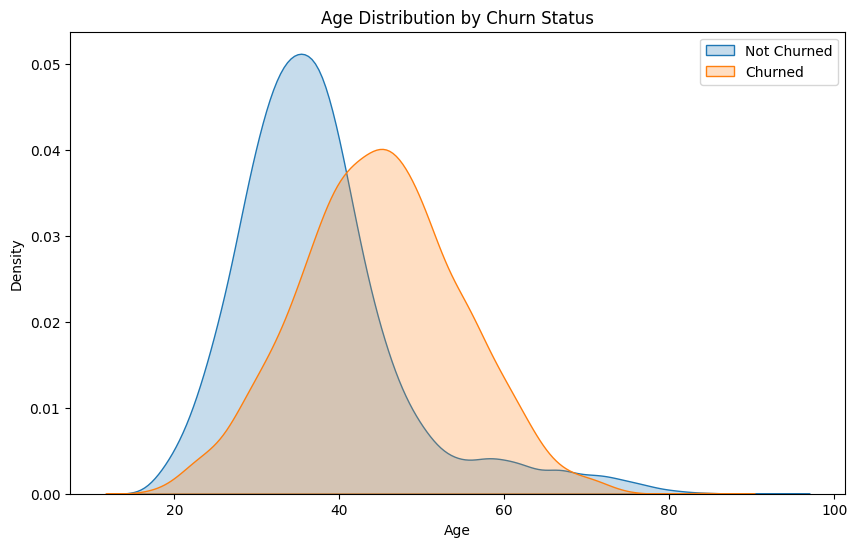

In [31]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df[df['Exited'] == 0]['Age'], label='Not Churned', fill=True)
sns.kdeplot(data=df[df['Exited'] == 1]['Age'], label='Churned', fill=True)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


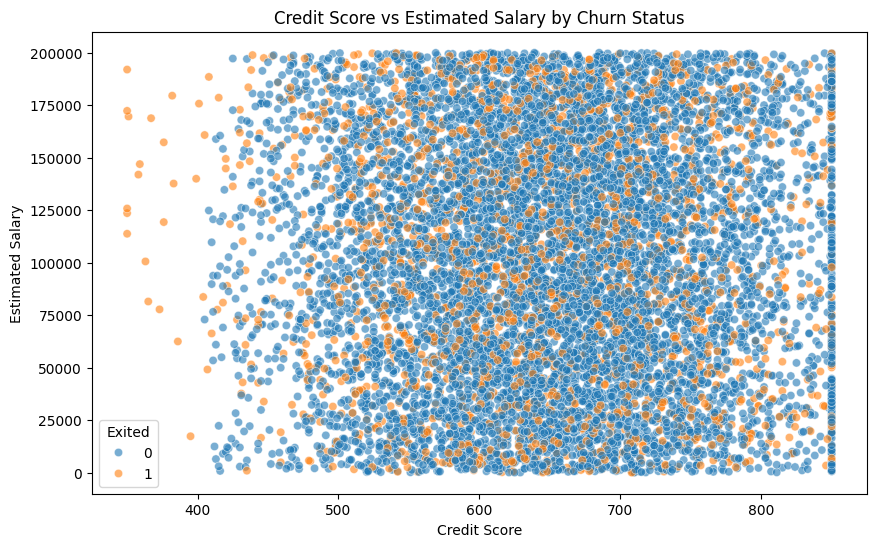

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='CreditScore', y='EstimatedSalary', hue='Exited', data=df, alpha=0.6)
plt.title('Credit Score vs Estimated Salary by Churn Status')
plt.xlabel('Credit Score')
plt.ylabel('Estimated Salary')
plt.show()
